In [3]:
import pickle 
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV

def train_normal_rfecv(files):
    for file in files:
        data = pd.read_pickle(file)
        print(file, data.shape)
        Y = data['class'].values
        data = data.drop(['class'],axis=1) 
        X = data.values
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

        clf = LogisticRegression(C=1.0, penalty='l1')
        ####original####
        clf.fit(X_train,Y_train)
        Ascores_Train = cross_val_score(clf, X_train, Y_train, cv=5)
        Ascores_Test = clf.score(X_test,Y_test)

        print ("LogisticRegression L1")
        print('train score',Ascores_Train.mean()) 
        print('std',Ascores_Train.std()) 
        print('test score',Ascores_Test)


        ################## rfecv ##################
        clf = LogisticRegression(C=1.0, penalty='l1')
        rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(Y_train, 2),
                      scoring='accuracy')

        rfecv.fit(X_train, Y_train)
        print('##############')
        print(file, "original Optimal number of features : %d" % rfecv.n_features_)

        plt.figure()
        plt.xlabel("Number of features selected")
        plt.ylabel("Cross validation score (nb of correct classifications)")
        plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
        plt.show()

        Ascores_Test = rfecv.score(X_test,Y_test)

        print ("logistic regression l1 with feature selection")
        print('test score',Ascores_Test)
        print()
        importance = []
        ranking = []

        for i,x in enumerate(rfecv.support_):
            if x == True:
                importance.append(data.columns[i])

        print(importance)
        print()

pickles/2017_original_sample_30_feature.p (5926, 122)
LogisticRegression L1
train score 0.787805047942
std 0.0109728258126
test score 0.787449392713
##############
pickles/2017_original_sample_30_feature.p original Optimal number of features : 21


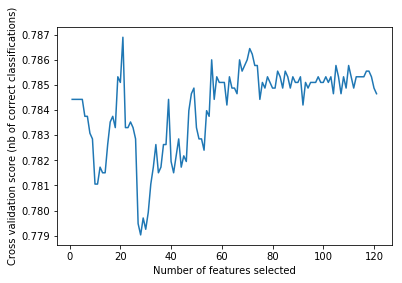

logistic regression l1 with feature selection
test score 0.77665317139

['disc_number', 'danceability', 'instrumentalness', 'artist_genres_christian', 'artist_genres_deep', 'artist_genres_neo', 'artist_genres_tropical', 'album_name_baby', 'album_name_big', 'album_name_hits', 'album_name_know', 'album_name_live', 'album_name_remixes', 'album_name_ultimate', 'song_name_acoustic', 'song_name_asot', 'song_name_christmas', 'song_name_like', 'song_name_night', 'song_name_piano', 'month_12']

pickles/2017_down_sample_30_feature.p (2562, 122)
LogisticRegression L1
train score 0.710566613543
std 0.0181756460887
test score 0.698907956318
##############
pickles/2017_down_sample_30_feature.p original Optimal number of features : 46


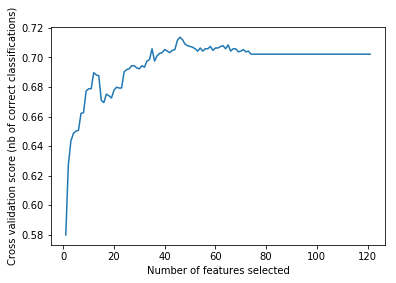

logistic regression l1 with feature selection
test score 0.695787831513

['explicit', 'speechiness', 'danceability', 'energy', 'instrumentalness', 'artist_genres_christian', 'artist_genres_classical', 'artist_genres_dance', 'artist_genres_deep', 'artist_genres_edm', 'artist_genres_hop', 'artist_genres_indie', 'artist_genres_latin', 'artist_genres_metal', 'artist_genres_music', 'artist_genres_post', 'artist_genres_rap', 'artist_genres_room', 'artist_genres_southern', 'artist_genres_teen', 'artist_genres_trap', 'artist_genres_tropical', 'album_name_album', 'album_name_baby', 'album_name_christmas', 'album_name_de', 'album_name_deluxe', 'album_name_life', 'album_name_like', 'album_name_live', 'album_name_remixes', 'album_name_soundtrack', 'song_name_acoustic', 'song_name_asot', 'song_name_en', 'song_name_feat', 'song_name_go', 'song_name_good', 'song_name_let', 'song_name_like', 'song_name_night', 'song_name_time', 'month_05', 'month_06', 'month_08', 'month_12']

pickles/2017_up_sample_30

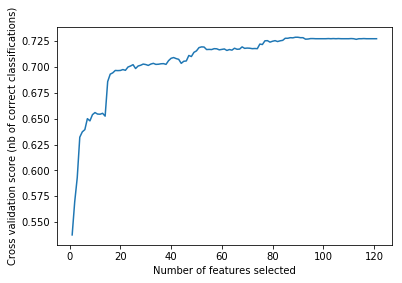

logistic regression l1 with feature selection
test score 0.729659922514

['explicit', 'disc_number', 'track_number', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'danceability', 'energy', 'time_signature', 'acousticness', 'instrumentalness', 'artist_genres_alternative', 'artist_genres_christian', 'artist_genres_christmas', 'artist_genres_classical', 'artist_genres_dance', 'artist_genres_deep', 'artist_genres_dwn', 'artist_genres_edm', 'artist_genres_folk', 'artist_genres_hop', 'artist_genres_house', 'artist_genres_indie', 'artist_genres_latin', 'artist_genres_metal', 'artist_genres_modern', 'artist_genres_music', 'artist_genres_neo', 'artist_genres_pop', 'artist_genres_post', 'artist_genres_rap', 'artist_genres_rock', 'artist_genres_room', 'artist_genres_southern', 'artist_genres_teen', 'artist_genres_trap', 'artist_genres_tropical', 'artist_genres_underground', 'album_name_album', 'album_name_baby', 'album_name_christmas', 'album_name_de', 'album_name_deluxe', 'alb

In [5]:
files = []
files.append('pickles/2017_original_sample_30_feature.p')
files.append('pickles/2017_down_sample_30_feature.p')
files.append('pickles/2017_up_sample_30_feature.p')
train_normal_rfecv(files)

pickles/2017_original_sample_100_feature.p (5926, 332)
LogisticRegression L1
train score 0.79477173803
std 0.0113176185894
test score 0.816464237517
##############
pickles/2017_original_sample_100_feature.p original Optimal number of features : 130


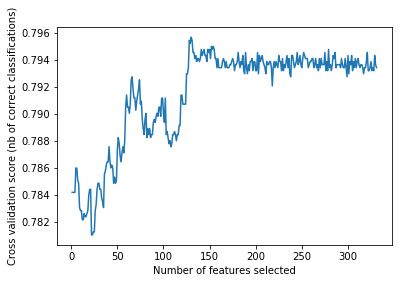

logistic regression l1 with feature selection
test score 0.7995951417

['explicit', 'disc_number', 'speechiness', 'liveness', 'valence', 'danceability', 'energy', 'acousticness', 'instrumentalness', 'artist_genres_alternative', 'artist_genres_americana', 'artist_genres_anthem', 'artist_genres_banda', 'artist_genres_blues', 'artist_genres_chillhop', 'artist_genres_christian', 'artist_genres_christmas', 'artist_genres_classical', 'artist_genres_coast', 'artist_genres_contemporary', 'artist_genres_dance', 'artist_genres_deep', 'artist_genres_drill', 'artist_genres_dwn', 'artist_genres_edm', 'artist_genres_electronic', 'artist_genres_emo', 'artist_genres_escape', 'artist_genres_flow', 'artist_genres_freak', 'artist_genres_gangster', 'artist_genres_grunge', 'artist_genres_hardcore', 'artist_genres_house', 'artist_genres_latino', 'artist_genres_mellow', 'artist_genres_metalcore', 'artist_genres_metropopolis', 'artist_genres_mexican', 'artist_genres_modern', 'artist_genres_neo', 'artist_genre

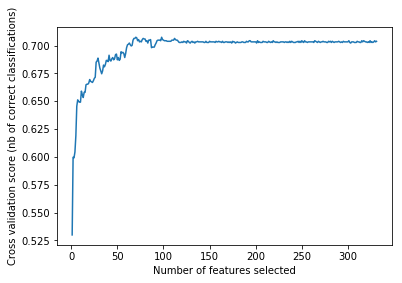

logistic regression l1 with feature selection
test score 0.731669266771

['speechiness', 'liveness', 'valence', 'danceability', 'energy', 'acousticness', 'instrumentalness', 'artist_genres_alternative', 'artist_genres_canadian', 'artist_genres_chillhop', 'artist_genres_christian', 'artist_genres_classical', 'artist_genres_crunk', 'artist_genres_dance', 'artist_genres_deep', 'artist_genres_drill', 'artist_genres_dwn', 'artist_genres_edm', 'artist_genres_electronic', 'artist_genres_emo', 'artist_genres_flow', 'artist_genres_folk', 'artist_genres_funk', 'artist_genres_gangster', 'artist_genres_kit', 'artist_genres_latino', 'artist_genres_metal', 'artist_genres_metalcore', 'artist_genres_metropopolis', 'artist_genres_modern', 'artist_genres_new', 'artist_genres_norteno', 'artist_genres_post', 'artist_genres_psych', 'artist_genres_punk', 'artist_genres_rap', 'artist_genres_reggaeton', 'artist_genres_regional', 'artist_genres_rock', 'artist_genres_room', 'artist_genres_screamo', 'artist_genr

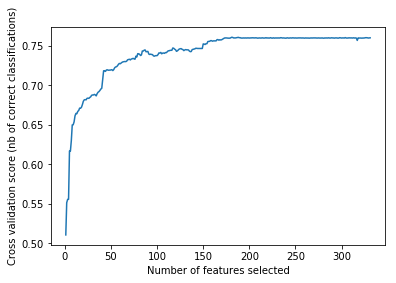

logistic regression l1 with feature selection
test score 0.745157124408

['explicit', 'mode', 'speechiness', 'liveness', 'danceability', 'instrumentalness', 'artist_genres_alternative', 'artist_genres_americana', 'artist_genres_anthem', 'artist_genres_banda', 'artist_genres_bass', 'artist_genres_big', 'artist_genres_blues', 'artist_genres_brostep', 'artist_genres_chamber', 'artist_genres_chillhop', 'artist_genres_chillwave', 'artist_genres_christian', 'artist_genres_christmas', 'artist_genres_classical', 'artist_genres_country', 'artist_genres_crunk', 'artist_genres_dance', 'artist_genres_deep', 'artist_genres_drill', 'artist_genres_dwn', 'artist_genres_edm', 'artist_genres_electro', 'artist_genres_electronic', 'artist_genres_emo', 'artist_genres_escape', 'artist_genres_flow', 'artist_genres_focus', 'artist_genres_freak', 'artist_genres_funk', 'artist_genres_gangster', 'artist_genres_garage', 'artist_genres_grunge', 'artist_genres_hardcore', 'artist_genres_hip', 'artist_genres_hop', 'a

In [7]:
files = []
files.append('pickles/2017_original_sample_100_feature.p')
files.append('pickles/2017_down_sample_100_feature.p')
files.append('pickles/2017_up_sample_100_feature.p')
train_normal_rfecv(files)